# COGS 108 - Final Project

# Overview

If anti-virus software is up to date, what are the factors that causes a computer to be infected with malware? We are trying to understand the relationship between malware infections and different device settings, such as firewall settings, OS platforms, browsers, locations, processors, etc. It’s usually pretty clear that devices without up to date anti-virus software are highly vulnerable. However, in the case of devices with up-to-date anti-virus software, the reasons for such a device to catch malware are much more ambiguous.

# Names

TEAM NAME: VAXX_HAPPENED

TEAM MEMBERS: Alvin Zhang, Kseniya Zelenaya, Yvonne Chen, Zhengzhou Huang


# Group Members IDs

Alvin Zhang: A15222835

Kseniya Zelenaya: A13097139

Yvonne Chen:A15533973

Zhengzhou Huang: A92020217

# Research Question

If anti-virus software is up to date, what are the most important factors that lead to malware infection? Can we use the data collected about device settings to predict the possibilities of detections of malware? More specifically, we are using values associated with users' devices, such as anti_virus products, Tpm, platform, processor, firewall settings, physical RAM, primary disk, the location of the device, and the fact if the user is a gamer, in order to build a model that not only accuratly predicts whether a device is vulnerable to malware or not, but also be able to explain the most important factors for each computer. 

## Background and Prior Work

People using current day tech such as laptops might wonder, “With today’s antivirius software, how is it still possible that my laptop might still be susceptible with malware?” In an article about anti-virus software, an expert pointed out that ranti-virus software is only a line of defense, but it will not protect one’s device from everything. In another research dayarticle, ”Malware Investigation by Analyzing Computer Memory,”  the analysts evaluated that anti-virus software only work partially as they address known viruses but not other vulnerabilities and malware as they are not known as much to the anti-virus software. 


In “Collecting and Analyzing Malware Data”, the authors argued that the vulnerability of anti-virus software comes from its reliance on “positive identification” of malware applications, such as a particular file name and certain executables. These identifications of malware processed by technicians are often influenced by  insufficient reports from users and the inability to analyze the malware in its complete from virtual environments. It is arguably hard to identify the reasons and origins of malware applications. An article by Rob Verger, “Your anti-virus Software is not Enough”, pointed out some reasons for a machine to catch malware, including the version of the operating system, different types of systems (Windows vs. IOS), and email providers. 


Not only that, but recently, processors have been shown to also display vulnerabilities, defying 20 years of previous security assumptions that hardware was immune to malware vulnerabilities. In the New York Times article, it showcases how these security vulnerabilities affect nearly all microprocessors from the past 20 years. These hardware vulnerabilities would allow a sort of ‘back door’ for malware to infect a computer, and bypass the usual anti-virus software.


Thus, given all these factors that can potentially bypass anti-virus software, we are interested in how these different factors and choices influence the chance of computer infection.


References:

https://patents.google.com/patent/US8667583B2/en

https://patents.google.com/patent/US8566944B2/en

https://www.popsci.com/antivirus-software-protect-your-computer

https://www.nytimes.com/2018/01/03/business/computer-flaws.html



# Hypothesis

Our hypothesis is that the leading factors of malware infection for computers with up-to-date antivirus software are the lack of several other security features, such as having a TPM Chip(a dedicated microcontroller designed to secure hardware), enabled firewall settings, and having secure boot enabled on the device.


# Datasets

The dataset we plan to use comes from a competition initiated by Microsoft, “Microsoft Malware Prediction”.  Link: https://www.kaggle.com/c/microsoft-malware-prediction/data. Since the data is collected by Microsoft, it is focused on Windows machines.


While the dataset that contains malware detection itself is around 4GBs and over 8 million lines, for the purpose of this project, we will be analyzing the first 100,000 observations in the dataset. Attempting to load 4GBs of information into Python and pandas would not be a good idea to say the least. We are confident that 100,000 is more than enough to help us answer our question that we proposed.

The dataset also contains over 80 variables. This is quite extensive, and while it would be nice to analyze all of them, it could prove to be tedious and difficult, as many of the variables seem unrelated or uninteresting for our analysis. Due to this, we have decided to narrow down the range of variables we are studying to 13 variables. These 13 variables are to us the most intriguing in terms of possible relation to malware infection. The variables, and what they mean are listed below:

-AVProductsInstalled: Does the observed device have an Anti-Virus Product installed.

-AVProductsEnabled: How many Anti-Virus Product(s) are turned on?

-hasTpm: Does the  device have a TPM chip for hardware encryption? 

-CountryIdentifier: integer that denotes a country

-Platform: Operating System(Windows 10, Windows 8.1, etc.)

-Processor: Integer representing a processor (i.e. 5 could represent an Intel i7 )

-SMode: Is Secure Mode turned on for Windows Machines

-Firewall: Is Firewall enabled

-Census_IsSecureBootEnabled: Is Secure boot enabled

-Census_PrimaryDiskTypeNam: Type of disk(SDD, HDD)

-Wdft_IsGamer: Is the device a gaming computer/desktop

-HasDetections: Does the system have malware on it?


# Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning/Preprocessing

Despite cutting the dataset down to the first 100,000 results, simpling calling in pd.read_csv can still result in numerous issues relating to not only space complexity, but also time complexity.

We can see the space complexity issue when we look at the the first 10 observations and their data types.

In [2]:
data = pd.read_csv('./malwareData.csv',chunksize=10)

sample_chunk = None
for chunk in data:
    sample_chunk = chunk
    break

sample_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 83 columns):
MachineIdentifier                                    10 non-null object
ProductName                                          10 non-null object
EngineVersion                                        10 non-null object
AppVersion                                           10 non-null object
AvSigVersion                                         10 non-null object
IsBeta                                               10 non-null int64
RtpStateBitfield                                     10 non-null int64
IsSxsPassiveMode                                     10 non-null int64
DefaultBrowsersIdentifier                            0 non-null float64
AVProductStatesIdentifier                            10 non-null int64
AVProductsInstalled                                  10 non-null int64
AVProductsEnabled                                    10 non-null int64
HasTpm                                  

There can be many optimizations done; for example, we can set all of the variables that are binary (0, 1) to equal int8.

We can also set 64 encoding to 32, or 16 if possible

We can utilize these optimizations by utlizing the dtype parameter in read_csv(). Utilizing the dtype parameter allows us to manually predefine the datatypes for each variable.

In [3]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [4]:
fulldata = pd.read_csv('./malwareData.csv',dtype=dtypes)

Now that we have our datset loaded, it's time to narrow it down to the variables we want to analyze

Now we can narrow our dataset to computers that only have up to date anti-virus software. This means that we want to keep observations where IsProtected is 1.

In [5]:
data = fulldata[fulldata['IsProtected'] == 1.0]


We then want to narrow our observations to computers that have up to date anti-virus software.

As stated above in the Dataset section, we want to analyze only the following variables:

* AVProductStatesIdentifier
* AVProductsInstalled
* AVProductsEnabled
* HasTpm
* CountryIdentifier
* Platform
* Processor
* SMode
* Firewall
* Census_IsSecureBootEnabled
* Census_PrimaryDiskTypeName
* Census_TotalPhysicalRAM
* Wdft_IsGamer
* HasDetections


Why these variables? Some, such as AVProductsEnabled (anti-virus products enabled), or Firewall, clearly relate to the computer security. Others, such as primary disk type, could give hints about a computers age (typically HDD, or hard disk drive, are in older computers). This could be important as computers may not be getting the most up to date software.

Let us narrow down our dataset to contain only the variables we want to analyze:

In [6]:

data = data[['AVProductStatesIdentifier','AVProductsInstalled','AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'Platform','Processor', 'SMode',
             'Firewall','Census_IsSecureBootEnabled','Census_PrimaryDiskTypeName','Census_TotalPhysicalRAM','Wdft_IsGamer','HasDetections']]


Check if there are any missing data in the data frame

In [7]:
print(data.isnull().sum())

#check the shape of the dataset including null values
print("\n" + str(data.shape))

AVProductStatesIdentifier        0
AVProductsInstalled              0
AVProductsEnabled                0
HasTpm                           0
CountryIdentifier                0
Platform                         0
Processor                        0
SMode                         4585
Firewall                      1016
Census_IsSecureBootEnabled       0
Census_PrimaryDiskTypeName     142
Census_TotalPhysicalRAM        861
Wdft_IsGamer                  3308
HasDetections                    0
dtype: int64

(94116, 14)


Because we do need all columns with meaningful values to build our predictive models, we need to get rid the code of null values:

In [8]:
data = data.dropna()


Quick look at the stripped data:

In [9]:
data.head()

,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,Platform,Processor,SMode,Firewall,Census_IsSecureBootEnabled,Census_PrimaryDiskTypeName,Census_TotalPhysicalRAM,Wdft_IsGamer,HasDetections
0,53447.0,1.0,1.0,1,29,windows10,x64,0.0,1.0,0,HDD,4096.0,0.0,0
1,53447.0,1.0,1.0,1,93,windows10,x64,0.0,1.0,0,HDD,4096.0,0.0,0
2,53447.0,1.0,1.0,1,86,windows10,x64,0.0,1.0,0,SSD,4096.0,0.0,0
3,53447.0,1.0,1.0,1,88,windows10,x64,0.0,1.0,0,UNKNOWN,4096.0,0.0,1
4,53447.0,1.0,1.0,1,18,windows10,x64,0.0,1.0,0,HDD,6144.0,0.0,1


In [10]:
data.dtypes

AVProductStatesIdentifier      float32
AVProductsInstalled            float16
AVProductsEnabled              float16
HasTpm                            int8
CountryIdentifier                int16
Platform                      category
Processor                     category
SMode                          float16
Firewall                       float16
Census_IsSecureBootEnabled        int8
Census_PrimaryDiskTypeName    category
Census_TotalPhysicalRAM        float32
Wdft_IsGamer                   float16
HasDetections                     int8
dtype: object

# Exploratory and Descriptive Data Analysis

In [11]:
data.head()

,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,Platform,Processor,SMode,Firewall,Census_IsSecureBootEnabled,Census_PrimaryDiskTypeName,Census_TotalPhysicalRAM,Wdft_IsGamer,HasDetections
0,53447.0,1.0,1.0,1,29,windows10,x64,0.0,1.0,0,HDD,4096.0,0.0,0
1,53447.0,1.0,1.0,1,93,windows10,x64,0.0,1.0,0,HDD,4096.0,0.0,0
2,53447.0,1.0,1.0,1,86,windows10,x64,0.0,1.0,0,SSD,4096.0,0.0,0
3,53447.0,1.0,1.0,1,88,windows10,x64,0.0,1.0,0,UNKNOWN,4096.0,0.0,1
4,53447.0,1.0,1.0,1,18,windows10,x64,0.0,1.0,0,HDD,6144.0,0.0,1



Get an idea of the number of rows and columns of the data (excluding the null values), and basic description of the dataset

In [12]:
row_num, col_num = data.shape
print("number of rows: " + str(row_num) + "; number of columns: " + str(col_num), end = "\n\n")

data.describe()

number of rows: 84702; number of columns: 14



,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,SMode,Firewall,Census_IsSecureBootEnabled,Census_TotalPhysicalRAM,Wdft_IsGamer,HasDetections
count,84702.000000,84702.0,84702.0,84702.000000,84702.000000,84702.0,84702.0,84702.000000,84702.000000,84702.0,84702.000000
mean,47667.164062,NaN,NaN,0.997214,108.331905,0.0,NaN,0.487037,6143.645996,0.0,0.510012
std,13524.596680,0.0,0.0,0.052712,63.165487,0.0,0.0,0.499835,4715.184570,0.0,0.499903
min,39.000000,1.0,1.0,0.000000,1.000000,0.0,0.0,0.000000,512.000000,0.0,0.000000
25%,49480.000000,1.0,1.0,1.000000,51.000000,0.0,1.0,0.000000,4096.000000,0.0,0.000000
50%,53447.000000,1.0,1.0,1.000000,97.000000,0.0,1.0,0.000000,4096.000000,0.0,1.000000
75%,53447.000000,2.0,1.0,1.000000,164.000000,0.0,1.0,1.000000,8192.000000,1.0,1.000000
max,70459.000000,5.0,4.0,1.000000,222.000000,1.0,1.0,1.000000,262144.000000,1.0,1.000000


We can see that many columns of the dataset are binary, meaning that it only contains 0 or 1. There are three that contains
strings, processor, Census_PrimaryDiskTypeName, and Platform, and there are three that has non-binary float numers, 
Census_TotalPhysicalRAM, CountryIdentifier and AVProductStatesIdentifier

Since many of the columns are binary and as we plan to use a logistic regression model later, it is useful to have an idea if
any of the columns (excluding HasDetection and columns containing strings) are highly correlated with each other

Below are the definitions of two functions that calculates the correlation between each column, store the values in a dict
and print the correlation values:

In [13]:
def populate_corr_dict(cols):
    for col1 in cols:
        if col1 not in corr_dict:
            corr_dict[col1] = dict()
        for col2 in cols:
            if col2 != col1 and col2 not in corr_dict:
                corr_dict[col1][col2] = data.corr()[col1][col2]

def print_corr(count_total, count_small):
    for k1 in corr_dict:
        for k2 in corr_dict[k1]:
            if abs(corr_dict[k1][k2]) >= 0.5:
                print("\n\nColumn1: " + k1 + "; Column2: " + k2 + "; abs(corr) > 0.5: " + str(corr_dict[k1][k2]), end="\n\n")
            elif abs(corr_dict[k1][k2]) <= 0.1:
                count_small += 1;
            else:
                print("Column1: " + k1 + "; Column2: " + k2 + "; 0.1 < abs(corr) < 0.5: " + str(corr_dict[k1][k2]))
            count_total += 1;

    print("\n\nTotal counts: "+ str(count_total) + "; counts of corr less than 0.1 : " + str(count_small))

In [14]:
corr_dict = dict()
cols = [col for col in data.columns if col not in ['HasDetections', 'Processor', 'Platform', 'Census_PrimaryDiskTypeName'] ]

populate_corr_dict(cols)

count_total, count_small = (0, 0)
            
print_corr(count_total, count_small)



Column1: AVProductStatesIdentifier; Column2: AVProductsInstalled; abs(corr) > 0.5: -0.66159490241

Column1: AVProductStatesIdentifier; Column2: AVProductsEnabled; 0.1 < abs(corr) < 0.5: -0.126306745829
Column1: AVProductsInstalled; Column2: AVProductsEnabled; 0.1 < abs(corr) < 0.5: 0.294800598955
Column1: AVProductsInstalled; Column2: Census_IsSecureBootEnabled; 0.1 < abs(corr) < 0.5: 0.214086605161
Column1: Census_TotalPhysicalRAM; Column2: Wdft_IsGamer; 0.1 < abs(corr) < 0.5: 0.156777851528


Total counts: 45; counts of corr less than 0.1 : 40


**Text Above:** only two columns have absolute value of correlation higher than 0.5. And majority of the columns have correlation less then 0.1. Those with correlation between 0.1 and 0.5 are around 0.1~0.2.

### Proportion of the AVG installed vs AVProducsEnabled
Here we can see the porportion of AVProductsInstalled verses AVProductsEnabled.

    AVProductsInstalled  AVProductsEnabled  proportion
0                   1.0                1.0    1.000000
1                   2.0                1.0    0.948387
2                   2.0                2.0    0.051613
3                   3.0                1.0    0.708535
4                   3.0                2.0    0.273752
5                   3.0                3.0    0.017713
6                   4.0                1.0    0.500000
7                   4.0                2.0    0.382353
8                   4.0                3.0    0.102941
9                   4.0                4.0    0.014706
10                  5.0                4.0    0.666667
11                  5.0                1.0    0.333333


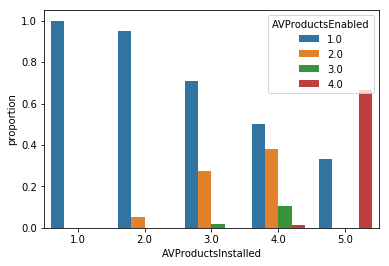

In [15]:
proportion_df = (data['AVProductsEnabled']
           .groupby(data['AVProductsInstalled'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())
print(proportion_df)
sns.barplot(x='AVProductsInstalled', 
            y='proportion', 
            hue='AVProductsEnabled', 
            data=proportion_df);

**Graph Above:** We can see whether or not the installed products were enabled. Or if the user 
decides to enable another product other than the one they installed.




Let's use a scatterplot to see how the number of AVProductsEnabled changes as number of AVProductsInstalled changes

Text(0.5, 1.0, 'Proportion of AVProductsEnabled compare to the number of AVProductsInstalled')

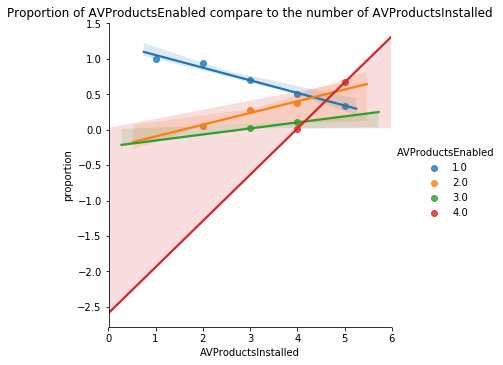

In [16]:
sns.lmplot(x='AVProductsInstalled', y='proportion', hue='AVProductsEnabled', data=proportion_df, legend=True)
ax = plt.gca()
ax.set_title("Proportion of AVProductsEnabled compare to the number of AVProductsInstalled")

By looking at the graph above, most users only enabled 1 AV products. The more AVProducts installed, more tend to be enabled

### Enabled vs Has Detection
Now that we see how much AVProducts is enabled, we will see if the enabled AVProducts has detections of malware or not.

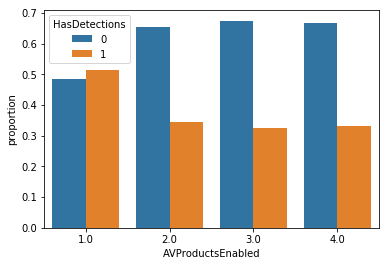

In [17]:
enabled_hasDet_proportion = (data['HasDetections']
           .groupby(data['AVProductsEnabled'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.barplot(x='AVProductsEnabled', 
            y='proportion', 
            hue='HasDetections', 
            data=enabled_hasDet_proportion);

Here we can see that AVProductsEnabled 2.0, 3.0. 4.0 has less malware detection than 1.0. 

Text(0.5, 1.0, 'Proportion of HasDetections compare to the number of AVProductsEnabled')

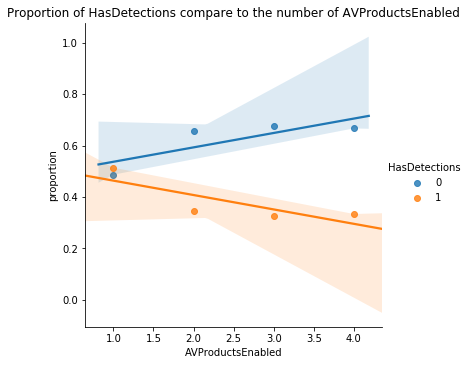

In [18]:
sns.lmplot(x='AVProductsEnabled', y='proportion', hue='HasDetections', data=enabled_hasDet_proportion, legend=True)
ax = plt.gca()
ax.set_title("Proportion of HasDetections compare to the number of AVProductsEnabled")

From the plot above, it seems that the more AVproducts enabled, it is less likely to have a detection. 
It might be useful to also plot the relationship between AVProductsInstalled and HasDetection

Text(0.5, 1.0, 'Proportion of HasDetections compare to the number of AVProductsInstalled')

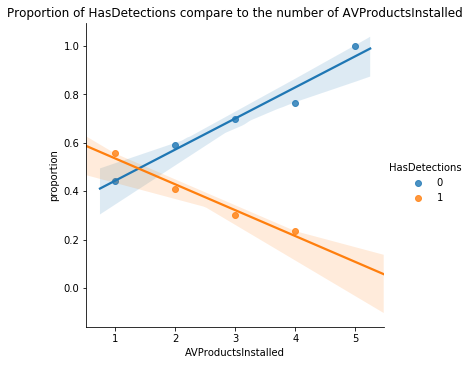

In [19]:
install_hasDet_proportion = (data['HasDetections']
           .groupby(data['AVProductsInstalled'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.lmplot(x='AVProductsInstalled', y='proportion', hue='HasDetections', data=install_hasDet_proportion, legend=True)
ax = plt.gca()
ax.set_title("Proportion of HasDetections compare to the number of AVProductsInstalled")

It seems that more AVProducts installed and more AVProducts enabled, the less likely a virus would be detected.
But since more AVProductsInstalled, more are likely to be enabled, we are not sure if AVProduct installation itself affects
the virus detection. 

Below are 4 graphs of proportions of HasDetection compared to the number of AVProductsInstalled. Each graph are based on a 
sub-dataset from the original dataset, with a one specified number for AVProductsEnabled

Text(0.5, 1.0, 'Proportion of HasDetections compare to the number of AVProductsInstalled, \n with AVProductsEnabled equals to 1')

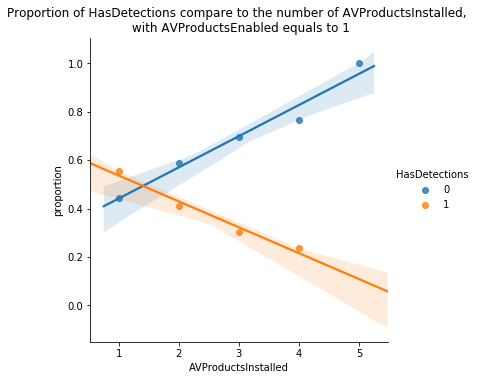

In [20]:
sub_data = data[data['AVProductsEnabled'] == 1]

inst_proportion = (sub_data['HasDetections']
           .groupby(sub_data['AVProductsInstalled'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.lmplot(x='AVProductsInstalled', y='proportion', hue='HasDetections', data=inst_proportion, legend=True)
ax = plt.gca()
ax.set_title("Proportion of HasDetections compare to the number of AVProductsInstalled, \n with AVProductsEnabled equals to 1")

Text(0.5, 1.0, 'Proportion of HasDetections compare to the number of AVProductsInstalled, \n with AVProductsEnabled equals to 2')

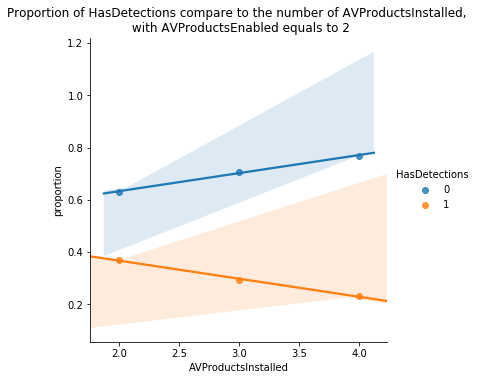

In [21]:
sub_data = data[data['AVProductsEnabled'] == 2]

inst_proportion = (sub_data['HasDetections']
           .groupby(sub_data['AVProductsInstalled'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.lmplot(x='AVProductsInstalled', y='proportion', hue='HasDetections', data=inst_proportion, legend=True)
ax = plt.gca()
ax.set_title("Proportion of HasDetections compare to the number of AVProductsInstalled, \n with AVProductsEnabled equals to 2")

Text(0.5, 1.0, 'Proportion of HasDetections compare to the number of AVProductsInstalled, \n with AVProductsEnabled equals to 3')

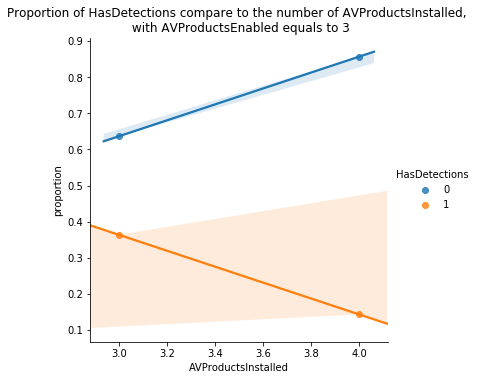

In [22]:
sub_data = data[data['AVProductsEnabled'] == 3]

inst_proportion = (sub_data['HasDetections']
           .groupby(sub_data['AVProductsInstalled'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.lmplot(x='AVProductsInstalled', y='proportion', hue='HasDetections', data=inst_proportion, legend=True)
ax = plt.gca()
ax.set_title("Proportion of HasDetections compare to the number of AVProductsInstalled, \n with AVProductsEnabled equals to 3")

Text(0.5, 1.0, 'Proportion of HasDetections compare to the number of AVProductsInstalled, \n with AVProductsEnabled equals to 4')

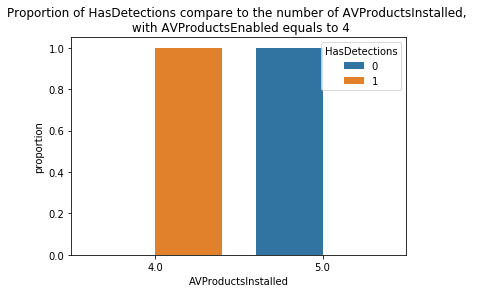

In [23]:
sub_data = data[data['AVProductsEnabled'] == 4]

inst_proportion = (sub_data['HasDetections']
           .groupby(sub_data['AVProductsInstalled'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.barplot(x='AVProductsInstalled', y='proportion', hue='HasDetections', data=inst_proportion)
ax = plt.gca()
ax.set_title("Proportion of HasDetections compare to the number of AVProductsInstalled, \n with AVProductsEnabled equals to 4")

For the last graph, we used a barplot, because it is more clear this way than the scattered plot. There is too few data to make a clear and reasonable scatter plot.

Except when (AVProductsEnabled == 4), that shows equal possibilities of having detection and having no detection, the other ones showed that, under the same number of AVProductsEnabled, the more AVProducts Installed, the less likely it is to detect virus.

#### Now we can see through the graphs that AVProductsEnabled and AVProductsInstalled are negatively correlated with HasDetection

Let's now check if there is a relationship between the version of platforms and hasDetection

First check how many unique platforms there are in the data set

In [24]:
data['Platform'].unique()


[windows10, windows7, windows8]
Categories (3, object): [windows10, windows7, windows8]

### Windows Platform vs Has Detections
Here we want to see if Windows Platforms has any effect on malware detection.

Text(0.5, 1.0, 'proportion of HasDetection - Platform')

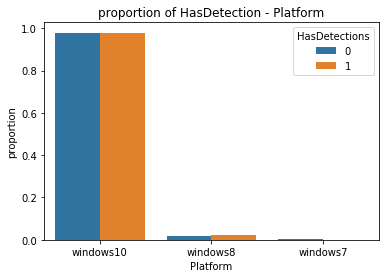

In [25]:
windowsPlat_vs_hasDetect = (data['Platform']
           .groupby(data['HasDetections'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.barplot(x='Platform', 
            y='proportion', 
            hue='HasDetections', 
            data=windowsPlat_vs_hasDetect);

ax = plt.gca()
ax.set_title('proportion of HasDetection - Platform')

We can see that a majority of users in our data collection uses windows 10. 
Therefore we will isolate Windows 10 and view it closely since the other two platforms has less significance. 

However, if we look closely, we can see that in Windows 8, there are slightly more detections than none.

For Windows 7, we can see that there are no detections of malware whatsoever.

### Now we will isolate Windows 10 and see if there is a difference in detection of malware

In [26]:
windows10Data = data.loc[data['Platform'] == 'windows10']
#windows10Data = windows10Data.groupby(['HasDetections'])

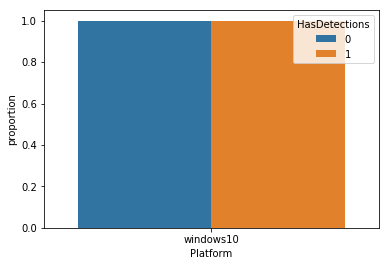

In [27]:
windowsPlat10_vs_hasDetect = (windows10Data['Platform']
           .groupby(windows10Data['HasDetections'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.barplot(x='Platform', 
            y='proportion', 
            hue='HasDetections', 
            data=windowsPlat10_vs_hasDetect);

**Graph Above:** There is no significant difference between detections found and no detections in windows10 platform.


### Quickly check Wdft_isGamer, Census_PrimaryDiskTypeName, Census_IsSecureBootEnabled, processor, HasTpm and their relationship with HasDetection

### Census_PrimaryDiskTypeName vs HasDetection

Text(0.5, 1.0, 'Proportion of HasDetections - Census_PrimaryDiskTypeName')

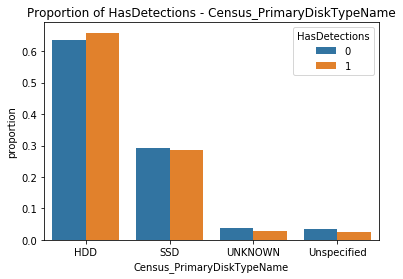

In [28]:
cen_vs_hasDetect = (data['Census_PrimaryDiskTypeName']
           .groupby(data['HasDetections'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.barplot(x='Census_PrimaryDiskTypeName', 
            y='proportion', 
            hue='HasDetections', 
            data=cen_vs_hasDetect);

ax = plt.gca()
ax.set_title("Proportion of HasDetections - Census_PrimaryDiskTypeName")

**Graph Above:** We can see if the disk types such as HDD or SDD display any detection based on the user. We also included Unknown and Unspecified disk types and see if there are detections of malware.

We can see that computers with HDD are slightly more prone to having detections than none. 

Computers with SSD have slightly less detection of malware based on the data given.

### Census_IsSecureBootEnabled vs HasDetection
**What is Secure Boot?:** Secure Boot is functionality that Microsoft uses to prevent malicious software application and "unauthorized" operating systems from loading during the system start-up process.

Text(0.5, 1.0, 'Proportion of HasDetections - Census_IsSecureBootEnabled')

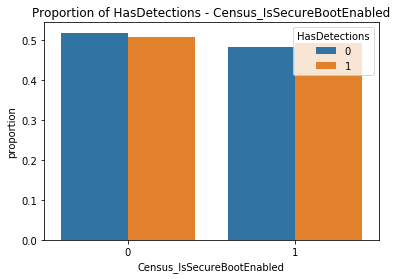

In [29]:
sec_vs_hasDetect = (data['Census_IsSecureBootEnabled']
           .groupby(data['HasDetections'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.barplot(x='Census_IsSecureBootEnabled', 
            y='proportion', 
            hue='HasDetections', 
            data=sec_vs_hasDetect);

ax = plt.gca()
ax.set_title("Proportion of HasDetections - Census_IsSecureBootEnabled")

**Graph Above:** Per definition of the Secure Boot, it is supposed to prevent malicious software. 

However, we see that when Secure Boot is enabled, there are more detections of malware. 

On the other hand, ironically, when Secure Boot is not enabled, there are less detections of malware.

### Processor vs HasDetection
**Processor or CPU:** They are the brains of the computer. It is the main chip that carries out tasks for the computer. x64 processors can handle 64-bit and 32-bit. x32 processors can only handle 32-bit. Arm64 processors only exists in androids for now.

Text(0.5, 1.0, 'Proportion of HasDetections - Processor')

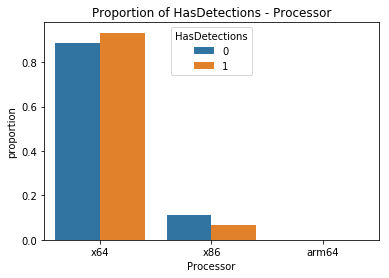

In [30]:
processor_vs_hasDetect = (data['Processor']
           .groupby(data['HasDetections'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.barplot(x='Processor', 
            y='proportion', 
            hue='HasDetections', 
            data=processor_vs_hasDetect);

ax = plt.gca()
ax.set_title("Proportion of HasDetections - Processor")

**Graph Above:** A majority of computers from the data uses the 64-bit processors. There are no users with arm64 processors which would make sense as they are usually in tablets and phones. 

However, we see that 64-bit processors tend to have more malware detection.

On the other hand 32-bit processors are prone to less detections of malware.

### Wdft_IsGamer vs HasDetection
**This is to see if gamers are more prone to malware:** They can be exposed to malicious software from games they download from the web.

Text(0.5, 1.0, 'Proportion of HasDetections - Wdft_IsGamer')

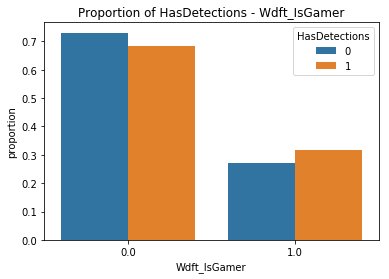

In [31]:
gamer_vs_hasDetect = (data['Wdft_IsGamer']
           .groupby(data['HasDetections'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.barplot(x='Wdft_IsGamer', 
            y='proportion', 
            hue='HasDetections', 
            data=gamer_vs_hasDetect);

ax = plt.gca()
ax.set_title("Proportion of HasDetections - Wdft_IsGamer")

**Graph Above:** As we can see, users that are gamers have more detections of malware than those who don't game.

#### TPM on Windows 10 vs Detected or not
**What is  TPM?:** A TPM(Trusted Platform Module) is a microchip that is often built into a computer to provide hardware-based security. They generate, store, and limit the use of cryptographic keys. They are most commonly used for used for system integrity measurements and for key creation and use. We will use this to compare to Windows10 Platform since the operating system are now automatically initializing and taking ownership of the TPM.

Text(0.5, 1.0, 'Proportion of HasDetections - HasTpm')

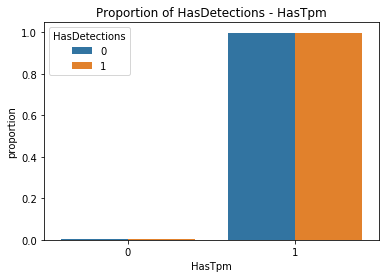

In [32]:
tpm_vs_hasDetect = (data['HasTpm']
           .groupby(data['HasDetections'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.barplot(x='HasTpm', 
            y='proportion', 
            hue='HasDetections', 
            data=tpm_vs_hasDetect);

ax = plt.gca()
ax.set_title("Proportion of HasDetections - HasTpm")

Unfortunately, this graph shows that every single computer has a TPM. The TPM also does not show much difference between detecting malware and not detecting malware.

### Above we only look at columns with binary values or strings / floats that have very limited unique values. Below, we look at columns with a larger range of values

Let's look at the distribution of these variables.

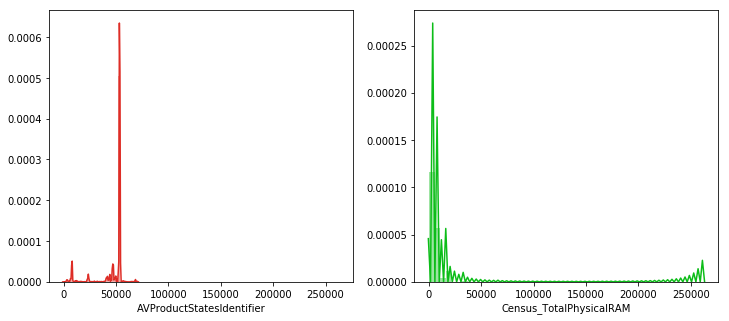

In [33]:
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

sns.distplot(data['AVProductStatesIdentifier'], color = '#DE2D26', ax=axes[0])

sns.distplot(data['Census_TotalPhysicalRAM'], color = '#0CBD18', ax=axes[1])

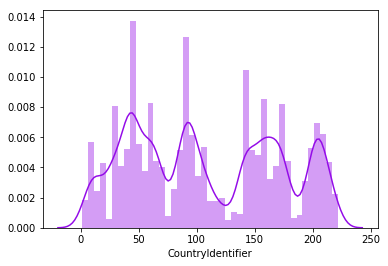

In [34]:
sns.distplot(data['CountryIdentifier'], color = '#940CE8')

AVProductStatesIdentifier and Census_TotalPhysicalRAM has a majority with the same/similar value, while countryIdentifier has 4 nodes/points, meaning that most countryIdenrifiers have or are close to one of the 4 values. Now let's see how these three factors are in relation with hasDetections: 

### AVProductStatesIdentifier v HasDetections

below has two plots for hasDetections = 0 and hasDetections = 1

Text(0.5, 1.0, 'Proportion of HasDetections equal to 0 - AVProductStatesIdentifier')

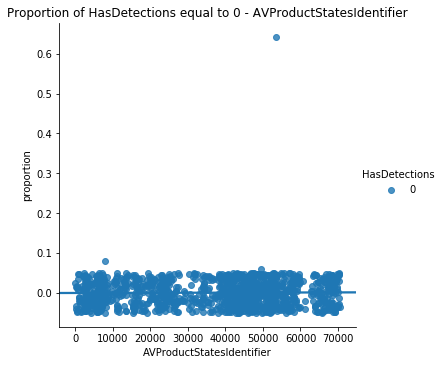

In [35]:
avp_vs_hasDetect = (data['AVProductStatesIdentifier']
           .groupby(data['HasDetections'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

trim1 = avp_vs_hasDetect[avp_vs_hasDetect['HasDetections'] == 0]
trim2 = avp_vs_hasDetect[avp_vs_hasDetect['HasDetections'] == 1]


sns.lmplot(x='AVProductStatesIdentifier', 
            y='proportion', 
            hue='HasDetections', 
            data=trim1, x_jitter=0.05, y_jitter=0.05)

ax = plt.gca()
ax.set_title('Proportion of HasDetections equal to 0 - AVProductStatesIdentifier')

Text(0.5, 1.0, 'Proportion of HasDetections equal to 1 - AVProductStatesIdentifier')

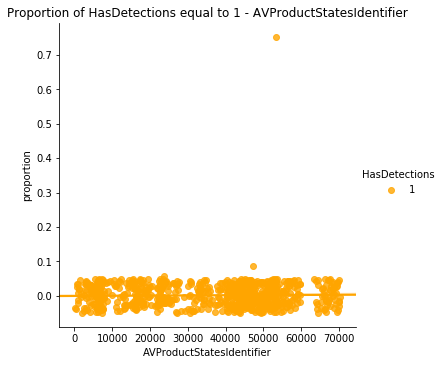

In [36]:
sns.lmplot(x='AVProductStatesIdentifier', 
            y='proportion', 
            hue='HasDetections', 
            data=trim2, x_jitter=0.05, y_jitter=0.05,
            line_kws={'color':'orange'},
            scatter_kws={'color':'orange'})

ax = plt.gca()
ax.set_title('Proportion of HasDetections equal to 1 - AVProductStatesIdentifier')

#### It seems that it is equally likely to have a detection and to miss a detection. 

Note that there are two outliers around (x = 50000). It might be because majority in the dataset has a same/similar value at that point, so the proportion is higher. Let us check if it is the case:

In [37]:
outlier = avp_vs_hasDetect.loc[avp_vs_hasDetect['proportion'] > 0.5].loc[0]['AVProductStatesIdentifier']
sum(data['AVProductStatesIdentifier'] == outlier)

59590

There are 59590 rows with the same AVProductStatesIdentifier value, so it is true that the outliers represent a large amount of population having the same value for AVProductStatesIdentifier.

### Census_TotalPhysicalRAM v HasDetections

Because Census_TotalPhysicalRAM is extremely skewed to left, and the "outliers" on the very right might affect the outcome of the plot. So we used a log10 arithmetic here

Text(0.5, 1.0, 'Proportion of HasDetections - Census_TotalPhysicalRAM')

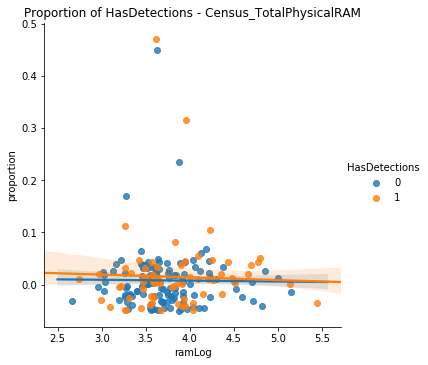

In [38]:
ram_vs_hasDetect = (data['Census_TotalPhysicalRAM']
           .groupby(data['HasDetections'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

ram_vs_hasDetect['ramLog'] = np.log10(ram_vs_hasDetect['Census_TotalPhysicalRAM'])

sns.lmplot(x='ramLog', 
            y='proportion', 
            hue='HasDetections', 
            data=ram_vs_hasDetect, x_jitter=0.05, y_jitter=0.05)

ax = plt.gca()
ax.set_title('Proportion of HasDetections - Census_TotalPhysicalRAM')



Note that points that have higher proportion represents higher population having the same/similar Census_TotalPhysicalRAM value.

#### By looking at the plot, there seems no obvious correlation between Census_TotalPhysicalRAM and HasDetections

### CountryIdentifier v HasDetections

Text(0.5, 1.0, 'Proportion of HasDetections - CountryIdentifier')

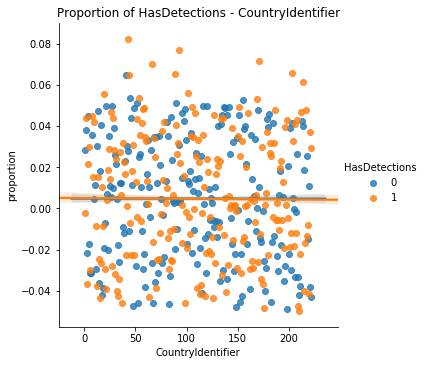

In [39]:
country_vs_hasDetect = (data['CountryIdentifier']
           .groupby(data['HasDetections'])
           .value_counts(normalize=True)
           .rename('proportion',inplace=True)
           .reset_index())

sns.lmplot(x='CountryIdentifier', 
            y='proportion', 
            hue='HasDetections', 
            data=country_vs_hasDetect, x_jitter=0.05, y_jitter=0.05)

ax = plt.gca()
ax.set_title('Proportion of HasDetections - CountryIdentifier')

#### By looking at the plot, there is no obvious relationship between HasDetections and CountryIdentifier

### Just by looking at the plots above, we can only get two varaibles, AVProductsInstalled and AVProductsEnabled, that have a rather strong correlation with HasDetection. To be more precise and to make a predictive model, we need to use logistic regression, so that we can analysize the data thoroughly. 

# Data Analysis & Results

### Correlation of variables:

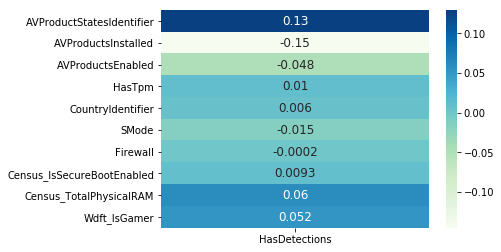

In [40]:
plt.subplots()
df_corr_HasDetections = data.corr()['HasDetections'][:-1]
sns.heatmap(df_corr_HasDetections.to_frame(),annot=True, annot_kws={'size':12},cmap="GnBu")

# sns.heatmap(data.corr(), annot = True)

At first glance, it seems like the variables don't really affect whether or not an anti-virus is detected in the first place. However, keep in mind that correlation does not mean causation; which would certainly be true here.

We want to find the variables with that would explain the most variation for HasDetections. We can first start off by doing a logistic regression, since we want to classify whether or not a virus is detected on the computer

Note that while we are doing a regression analysis, we are specifically trying to do a logistic regression (since we are classifying). Thus, we should not need to standardize our variables.

In [41]:
import statsmodels.api as sm

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


We also need to encode certain variables that aren't numberic, which are 'Platform', 'Processor', and Census_PrimaryDiskTypeName.

Lets first take a look at all the unique value for each 3 variables.

First up: Platform.

In [42]:
data['Platform'].unique()

[windows10, windows7, windows8]
Categories (3, object): [windows10, windows7, windows8]

Next is Processor:

In [43]:
data['Processor'].unique()

[x64, arm64, x86]
Categories (3, object): [x64, arm64, x86]

Lastly is 'Census_PrimaryDiskTypeName'

In [44]:
data['Census_PrimaryDiskTypeName'].unique()

[HDD, SSD, UNKNOWN, Unspecified]
Categories (4, object): [HDD, SSD, UNKNOWN, Unspecified]

Let us then look into the frequency of each unique data type for each variable, so we know whether or not we can do a simple binary encode.

[Text(0, 0.5, 'Percent')]

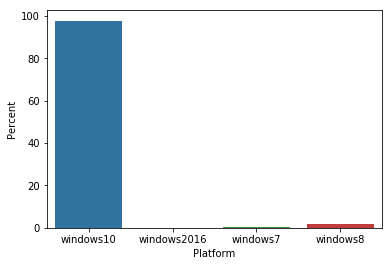

In [45]:

ax = sns.barplot(x="Platform", y="Platform", data=data, estimator=lambda x: len(x) / len(data) * 100, orient="v")
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

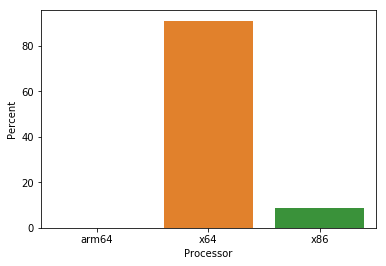

In [46]:

ax = sns.barplot(x="Processor", y="Processor", data=data, estimator=lambda x: len(x) / len(data) * 100, orient="v")
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

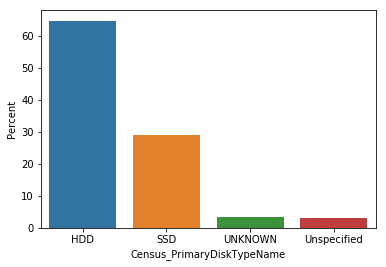

In [47]:

ax = sns.barplot(x="Census_PrimaryDiskTypeName", y="Census_PrimaryDiskTypeName", data=data, estimator=lambda x: len(x) / len(data) * 100, orient="v")
ax.set(ylabel="Percent")

Based off these charts, since 2 variables account for over 93% of all variables for all 3 categories, we can probably encode all three as binary encodings. The only category that could be questionable is 'Census_PrimaryDiskTypeName'.

Because of this, we can simply save this column into another variable just in case.


In [48]:
originalCensusDisk = data['Census_PrimaryDiskTypeName']

Encoding:

In [49]:
data['Platform']= data['Platform'].apply(lambda x: 1 if x == 'windows10' else 0)
data['Census_PrimaryDiskTypeName']= data['Census_PrimaryDiskTypeName'].apply(lambda x: 1 if x == 'HDD' else 0)
data['Processor']= data['Processor'].apply(lambda x: 1 if x == 'x64' else 0)
data.head()

,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,Platform,Processor,SMode,Firewall,Census_IsSecureBootEnabled,Census_PrimaryDiskTypeName,Census_TotalPhysicalRAM,Wdft_IsGamer,HasDetections
0,53447.0,1.0,1.0,1,29,1,1,0.0,1.0,0,1,4096.0,0.0,0
1,53447.0,1.0,1.0,1,93,1,1,0.0,1.0,0,1,4096.0,0.0,0
2,53447.0,1.0,1.0,1,86,1,1,0.0,1.0,0,0,4096.0,0.0,0
3,53447.0,1.0,1.0,1,88,1,1,0.0,1.0,0,0,4096.0,0.0,1
4,53447.0,1.0,1.0,1,18,1,1,0.0,1.0,0,1,6144.0,0.0,1


Now that we've finshed the encoding, we just need to find a way to model the dataset and figure out which variables are important.

Before that, let's check the correlation between each variables again, because we formated the columns with string values into binary values. So it is possible to check correlation between every columns now

In [50]:
cols = [col for col in data.columns if col not in ['HasDetections'] ]

populate_corr_dict(cols)

count_total,count_small = (0, 0)
print_corr(count_total, count_small)



Column1: AVProductStatesIdentifier; Column2: AVProductsInstalled; abs(corr) > 0.5: -0.66159490241

Column1: AVProductStatesIdentifier; Column2: AVProductsEnabled; 0.1 < abs(corr) < 0.5: -0.126306745829
Column1: AVProductStatesIdentifier; Column2: Census_PrimaryDiskTypeName; 0.1 < abs(corr) < 0.5: -0.109286054246
Column1: AVProductsInstalled; Column2: AVProductsEnabled; 0.1 < abs(corr) < 0.5: 0.294800598955
Column1: AVProductsInstalled; Column2: Census_IsSecureBootEnabled; 0.1 < abs(corr) < 0.5: 0.214086605161
Column1: AVProductsInstalled; Column2: Census_PrimaryDiskTypeName; 0.1 < abs(corr) < 0.5: 0.116140496928
Column1: AVProductsEnabled; Column2: Platform; 0.1 < abs(corr) < 0.5: -0.185735715641
Column1: HasTpm; Column2: Platform; 0.1 < abs(corr) < 0.5: 0.235749207675
Column1: Census_IsSecureBootEnabled; Column2: Census_PrimaryDiskTypeName; 0.1 < abs(corr) < 0.5: 0.105898545744
Column1: Census_TotalPhysicalRAM; Column2: Wdft_IsGamer; 0.1 < abs(corr) < 0.5: 0.156777851528
Column1: Pr

Similarly, only two columns have absolute value of correlation higher than 0.5. And majority of the columns have correlation less then 0.1. Those with correlation between 0.1 and 0.5 are around 0.1~0.2. 
#### Now let's dive into the prediction model.

One model that is typically accurate and readily gives out which variables are important is a RandomForestClassifier. Thus, we will use a RandomForestClassifier to model and figure out the variable importance.

We first need to divy up our cells into training and testing. This will be important, because if our model isn't totally accurate, than it could mean that our data is skewed (since we only chose the top 100000), or we narrowed out/excluded important variables. Both would impact our hypothesis.

In [51]:
cols = [col for col in data.columns if col not in ['HasDetections']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[cols], data['HasDetections'], test_size=0.2)

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Let us first look at each variable importance, ordered by most important to least.

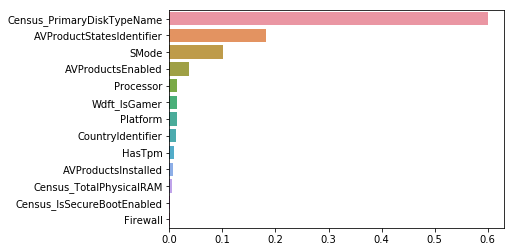

In [53]:
variableImportance = pd.Series(clf.feature_importances_,index=data.columns.difference(['HasDetections'])).sort_values(ascending=False)
sns.barplot(variableImportance, variableImportance.index)

Now we need to check look at how our model did in order to ensure the validity of these variable importances.

In [54]:
predictions = clf.predict(X_test)
sum(predictions==y_test)/len(y_test)

0.5630128091612066

In [55]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

pred_tr_y = clf.predict(X_train)
pred_te_y = clf.predict(X_test)

print('train_data_accuracy:\n')
print(classification_report(y_train, pred_tr_y))
print('test_date_accuracy:\n')
print(classification_report(y_test, pred_te_y))

train_data_accuracy:

              precision    recall  f1-score   support

           0       0.76      0.63      0.69     33216
           1       0.70      0.81      0.75     34545

   micro avg       0.72      0.72      0.72     67761
   macro avg       0.73      0.72      0.72     67761
weighted avg       0.73      0.72      0.72     67761

test_date_accuracy:

              precision    recall  f1-score   support

           0       0.56      0.48      0.52      8287
           1       0.56      0.65      0.60      8654

   micro avg       0.56      0.56      0.56     16941
   macro avg       0.56      0.56      0.56     16941
weighted avg       0.56      0.56      0.56     16941



Let's drop the columns whose importance levels are not significantly different 0

In [56]:
data_trim = data.drop(columns = ['Wdft_IsGamer','Platform', 'CountryIdentifier', 'HasTpm', 'AVProductsInstalled', 'Census_TotalPhysicalRAM', 'Census_IsSecureBootEnabled', 'Firewall'])
data_trim.head()

,AVProductStatesIdentifier,AVProductsEnabled,Processor,SMode,Census_PrimaryDiskTypeName,HasDetections
0,53447.0,1.0,1,0.0,1,0
1,53447.0,1.0,1,0.0,1,0
2,53447.0,1.0,1,0.0,0,0
3,53447.0,1.0,1,0.0,0,1
4,53447.0,1.0,1,0.0,1,1


In [57]:
cols_trim = [col for col in data_trim.columns if col not in ['HasDetections']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_trim[cols_trim], data_trim['HasDetections'], test_size=0.2)

clf2=RandomForestClassifier(n_estimators=1000, random_state=42)
clf2.fit(X_train2,y_train2)

clf2.score(X_test2, y_test2)

0.5870373649725518

As seen above, after dropping insignificant variables from the data, and predited results have better precision, 
(imporoved from 0.56 to around 0.59), but the improvement is relatively small.

This means that our variable importance given by the model isn't accurate. Thus, it would be best to take the model's variable importance with a grain of salt.

Below, we shall do a extra trees classifier to see if we can get better accuracy and see if the variable importance is different for the extra trees classifier model. If the extra trees classifier is significantly more accurate, then we can consider the variable importance of the extra trees classifier over the random forest classifier.

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
xtraTrees = ExtraTreesClassifier(n_estimators=1000, random_state=42)
xtraTrees.fit(X_train,y_train)



ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

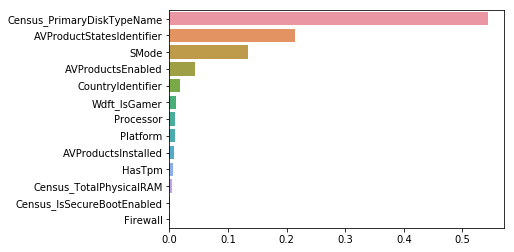

In [59]:
variableImportanceXtraTrees = pd.Series(xtraTrees.feature_importances_,index=data.columns.difference(['HasDetections'])).sort_values(ascending=False)
sns.barplot(variableImportanceXtraTrees, variableImportanceXtraTrees.index)


While the variable importance is the same in general, we can see that the CountryIdentifier is more important than processor. Now let's see the accuracy:

In [60]:
xtraTrees.score(X_test, y_test)

0.5611829289888436

We can now see that the accuracy of the model is around the same as the random forest. In fact, it is actually slightly less accurate (around 0.5%). Lets see if trimming the variables that are less important can help boost the accuracy of the model

In [61]:
data_trim_xtraTrees = data.drop(columns = ['Wdft_IsGamer','Platform', 'Processor', 'HasTpm', 'AVProductsInstalled', 'Census_TotalPhysicalRAM', 'Census_IsSecureBootEnabled', 'Firewall'])
data_trim_xtraTrees.head()


,AVProductStatesIdentifier,AVProductsEnabled,CountryIdentifier,SMode,Census_PrimaryDiskTypeName,HasDetections
0,53447.0,1.0,29,0.0,1,0
1,53447.0,1.0,93,0.0,1,0
2,53447.0,1.0,86,0.0,0,0
3,53447.0,1.0,88,0.0,0,1
4,53447.0,1.0,18,0.0,1,1


In [62]:
cols_trim = [col for col in data_trim_xtraTrees.columns if col not in ['HasDetections']]
X_trainXtra, X_testXtra, y_trainXtra, y_testXtra = train_test_split(data_trim_xtraTrees[cols_trim], data_trim_xtraTrees['HasDetections'], test_size=0.2)

xtraTrees2=ExtraTreesClassifier(n_estimators=1000, random_state=42)
xtraTrees2.fit(X_trainXtra,y_trainXtra)

xtraTrees2.score(X_testXtra, y_testXtra)


0.566377427542648

As we can see the accruacy barely improved. Thus, random forest is our best model.

However, since Random Forest is our best model, and it only has a 59% accuracy rate, we can't definitively say that the most important variables, based off of the Random Forest model, are the Disk type and the antivirus app one uses. Thus, any of the variable importance given by the model should be taken with a grain of salt.

What this means in the end is that our hypothesis is most likely incorrect. Both TPM and firewall are at the lower end of variable importance in the model, and while SMode is one of the higher ones, it is not the most significant. However, this should also be taken with a grain of salt since again the model is not very accurate.

# Ethics & Privacy

Based on the current dataset about malware we found, the majority of users’ information, such as engine version, platform version, and machine type, is non-sensitive. Some of the privacy-sensitive data, such as geographic locations of users’ devices, are protected by using ID numbers. However, there are potential privacy-sensitive information, including the individual machine ID and users’ English ID names. The current dataset we found was collected by Microsoft, and it claims that the sampling methodology used to create this dataset meets certain business constraints, including user privacy. It is probably ethical to research with this data; however, we are aware that the process of malware detection often involves users’ private information and the data collected might have privacy issues. Since we are not using those variables containing possible private contents, we will not accidently disclose privacy-sensitive information.

# Conclusion & Discussion

The project is based on the research on whether leading factors of malware infection for computers are relevant in the development of security features installed, with the implication that most programs search for known viruses with non-common going through the firewall. It was hypothesized that the lack of secuirty features besides the update ant-virus firewalls can result in the infection of malware in ones' computer. Current laptop models come with featured anti-virus program that insist that has the security to protect against viruses and malware. 

We started off by collecting datasets from Microsoft's, "Malware Prediction", which were primarily conducted by the Windows machines. With the reference that there was a lot of data to work with, we minimized to observing only 10,000 out of the 8 million lines in the dataset, as well as containing only 13 out of 80 variables in order for the analysis to be more adequate without effecting Pandas platform. Each variable has its own performance in relation to identifying the type of machine, what the purpose of usage is, if it contains an anti-virus program and whether the system is at risk for obtaining a virus. From the Exploratory Data Analysis, most devices are Windows 10, with x64 processor, HDD disk, and most of them have same or similar anti-virus products state and physical RAM. Based on the plots generated in the EDA section, only two variables AVProductsEnabled and AVProductsInstalled, seems to have a relatively strong correlation with HasDetections. However, because the plots only suggest correlations but not causations, we need to dive in and analysize the data with logistic regression.

After we encode the data types for all columns and checked correlations between each column, we used a RandomForestClassifer to build our predictive model. The first run of our predictive model doesn't produce very precise results (precision 0.56). To see what the best predictors of virus detectors are, we checked the level of importance for all columns. Dropping insignificant variables from the data slightly increased the prediction rate of better precision (precision increased from 0.56 to 0.58), but it does not provide efficient evidence to see a difference. 

### Our hypothesis states that the leading factors of malware infection for computers with up-to-date antivirus software are the lack of several other security features, such as having a TPM Chip, enabled firewall settings, and having secure boot enabled on the device. However, even though the exploratory analysis shows a negative correlation between malware detection and the number of anti-virus products installed and enabled, the result of our analysis shows that these factors do not have enough significance on the ability of malware detection. 

# References

For help regarding how to load in large sample sizes by defining data types using the dtype field in read_csv:

https://www.kaggle.com/shrutimechlearn/large-data-loading-trick-with-ms-malware-data